In [1]:
#Import data analysis and exploration libraries:
import numpy as np
import pandas as pd

#Import data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

#Import model libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#Import Metrics libraries:
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#Load the dataset:
train_dataset = pd.read_csv(r"C:/MY-PROJECTS/Demo Datasets/Lesson 4/bigmart_train.csv")

In [3]:
#Print first 10 records from the dataset:
train_dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train_dataset.shape

(8523, 12)

In [5]:
#Checking for null values:
train_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#Printing the unique values under the column Item_Fat_Content:
train_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
#Printing the unique values under the column Outlet_Establishment_Year:
train_dataset['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
#Calculate the outlet age:
train_dataset['Outlet_age'] = 2020 - train_dataset['Outlet_Establishment_Year']
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [9]:
#Printing the unique values under the column Outlet_Size:
train_dataset['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
#Get descriptive statistics of the dataset:
train_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,22.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,33.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,35.000000


In [11]:
#Printing the frequency of each nominal variable in column Item_Fat_Content:
train_dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#Printing the frequency of each nominal variable in column Outlet_size:
train_dataset['Outlet_Size'].value_counts()

In [12]:
train_dataset['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
#Using 'Mode' to find the most frequent value in column Outlet_size:
most_frequent_val = train_dataset['Outlet_Size'].mode()
type(most_frequent_val)

pandas.core.series.Series

In [16]:
#Print the value:
most_frequent_val

0    Medium
dtype: object

In [17]:
#Check the length:
len(most_frequent_val)

1

In [18]:
#Get the value:
most_frequent_val[0]

'Medium'

- Replacing missing values in column **Outlet_size** with value **Medium**(most frequent value).

In [19]:
train_dataset['Outlet_Size'] = train_dataset['Outlet_Size'].fillna(train_dataset['Outlet_Size'].mode()[0])

In [20]:
#Check again column 'Outlet_Size':
train_dataset['Outlet_Size'].isnull().sum()

0

In [15]:
#Check frequency of nominal variable in column 'Outlet_Size':
train_dataset['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- Replacing missing values in column **Item_weight** with **mean** weight:

In [21]:
train_dataset['Item_Weight'] = train_dataset['Item_Weight'].fillna(train_dataset['Item_Weight'].mean())

- Plotting **Histogram** reveals the **Distribution** of the column Item_visibility:

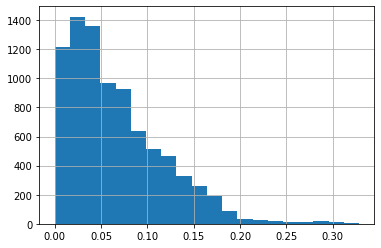

In [22]:
train_dataset['Item_Visibility'].hist(bins=20)
plt.show()

In [20]:
#Let's view the column 'Item_Visibility':
train_dataset['Item_Visibility'][:5]

0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

- Removing the Outliers:

In [23]:
#Define first Quartile range:
Q1 = train_dataset['Item_Visibility'].quantile(0.25)
#Define third Quartile range:
Q3 = train_dataset['Item_Visibility'].quantile(0.75)
#Define IQR range:
IQR = Q3 - Q1
#Remove the outliers:
filt_training_dataset = train_dataset.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [24]:
#Let's Display the filtered dataframe:
filt_training_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [25]:
#Print the Descriptive Stat again:
filt_training_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
count,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000
mean,12.864794,0.063061,140.968471,1997.948443,2212.891704,22.051557
std,4.242004,0.046130,62.272255,8.352477,1703.559375,8.352477
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,9.300000,0.026789,93.794900,1987.000000,874.861200,16.000000
50%,12.857645,0.052729,142.915400,1999.000000,1830.950000,21.000000
75%,16.100000,0.092277,185.625300,2004.000000,3124.599400,33.000000
max,21.350000,0.195721,266.888400,2009.000000,13086.964800,35.000000


In [24]:
#Check the shape of the resulting dataset:
filt_training_dataset.shape , train_dataset.shape

((8379, 13), (8523, 13))

In [26]:
#Check the datatypes of the columns:
filt_training_dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_age                     int64
dtype: object

In [32]:
#Check count of unique values in column Item_Visibility:
len(np.unique(filt_training_dataset['Item_Visibility']))

7736

In [28]:
#Check for minimum value in column 'Item_Visibility':
filt_training_dataset['Item_Visibility'].min()

0.0

In [29]:
#Check for max value in column 'Item_Visibility':
filt_training_dataset['Item_Visibility'].max()

0.195721125

In [26]:
#Modifying the values under the column Item_Visibility into categories as low_visibility,medium_visibility and high_visibility:
filt_training_dataset['Item_Visibility_bins'] = pd.cut(filt_training_dataset['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                                      labels=['Low_Viz','Viz','High_Viz'])

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
#Printing the count of each category under the column Item_Visibility_bins:
filt_training_dataset['Item_Visibility_bins'].value_counts()

Low_Viz     4403
Viz         2557
High_Viz     893
Name: Item_Visibility_bins, dtype: int64

In [27]:
#Check for any null value:
filt_training_dataset['Item_Visibility_bins'].isnull().sum()

526

In [28]:
#Replacing null values with 'Low_Viz':
filt_training_dataset['Item_Visibility_bins'] = filt_training_dataset['Item_Visibility_bins'].replace(np.nan,'Low_Viz',regex=True)

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
#Check unique values under the column 'Item_Fat_Content':
filt_training_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
#Replacing all representations of variable 'Low Fat':
filt_training_dataset['Item_Fat_Content'] = filt_training_dataset['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
#Represent all representations of 'Regular':
filt_training_dataset['Item_Fat_Content'] = filt_training_dataset['Item_Fat_Content'].replace('reg','Regular')

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
#Let's see the data once:
filt_training_dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,Low_Viz
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,Low_Viz
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,Low_Viz
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,Low_Viz
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,Low_Viz
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,11,Low_Viz
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33,Low_Viz
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,35,Viz
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,18,Low_Viz
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,13,Viz


- Now, let's start to convert all categorical variables in column into numerical:

In [32]:
#INSTANTIATE LABEL ENCODER:
label_encoder = LabelEncoder()

In [38]:
#Let's view all the frequencies of unique values in column Item_Fat_Content:
filt_training_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [33]:
#Transforming:
filt_training_dataset['Item_Fat_Content'] = label_encoder.fit_transform(filt_training_dataset['Item_Fat_Content'])

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
#Transforming 'Item_Visibility_bins':
filt_training_dataset['Item_Visibility_bins'] = label_encoder.fit_transform(filt_training_dataset['Item_Visibility_bins'])

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
#Transforming 'Outlet_Size':
filt_training_dataset['Outlet_Size'] = label_encoder.fit_transform(filt_training_dataset['Outlet_Size'])

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
#Transforming 'Outlet_Location_Type':
filt_training_dataset['Outlet_Location_Type'] = label_encoder.fit_transform(filt_training_dataset['Outlet_Location_Type'])

C:\Users\Phase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
#View the Transformed Dataset:
filt_training_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11,1
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22,1
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33,1


In [39]:
#Check unique values in each encoded column:
print(filt_training_dataset['Item_Visibility_bins'].unique())
print(filt_training_dataset['Outlet_Size'].unique())

[1 2 0]
[1 0 2]


In [44]:
#View the datatype again:
filt_training_dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_age                     int64
Item_Visibility_bins           int32
dtype: object

In [41]:
#Check unique values in column 'Outlet_Type':
filt_training_dataset['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [42]:
#ONE-HOT-ENCODING:
#Let's create dummies for 'Outlet_Type':
dummy = pd.get_dummies(filt_training_dataset['Outlet_Type'])

In [43]:
#Check type of dummy variable:
type(dummy)

pandas.core.frame.DataFrame

In [44]:
#print the dataframe:
filt_training_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11,1
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22,1
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33,1


In [47]:
#View the dummies:
dummy.head(7)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0


In [45]:
#Merging both Dataframes--- filt_training_dataset + dummy
filt_training_dataset = pd.concat([filt_training_dataset,dummy],axis=1)

In [46]:
#View the merged dataframe:
filt_training_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21,1,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11,1,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21,1,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22,1,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33,1,0,1,0,0


In [50]:
#Check Data types of the column:
filt_training_dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [47]:
#Drop Irrelevant Variables:
filt_training_dataset = filt_training_dataset.drop(['Item_Identifier','Item_Type','Outlet_Identifier',
                                                    'Outlet_Establishment_Year','Outlet_Type'],axis=1)

In [48]:
#View the columns:
filt_training_dataset.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [49]:
#View the dataset:
filt_training_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,1,0,1,0,0


In [83]:
#Create Dependent and Independent variables(we drop target column for this):
X_train = filt_training_dataset.drop('Item_Outlet_Sales',axis=1)
y_train = filt_training_dataset.Item_Outlet_Sales

### Working with Test Dataset:

In [51]:
#Import the dataset into pandas dataframe:
test_dataset = pd.read_csv(r'C:/MY-PROJECTS/Demo Datasets/Lesson 4/bigmart_test.csv')

In [52]:
#View the dataset:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [58]:
#Check shape of the dataset:
test_dataset.shape

(5681, 11)

In [53]:
#Check for missing values:
test_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [57]:
#Check unique values and their frequencies in column 'Outlet_Size':
test_dataset['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [59]:
#Fill null values in column 'Outlet_Size' with 'Medium' value:
test_dataset['Outlet_Size'] = test_dataset['Outlet_Size'].fillna('Medium')

In [60]:
#Check unique values in column 'Item_Fat_Content':
test_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [61]:
#Replacing all representations of lF,low fat to 'Low_Fat':
test_dataset['Item_Fat_Content'] = test_dataset['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat',regex=True)

In [69]:
#Check unique values again:
test_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular'], dtype=object)

In [70]:
#Replacing all representations of reg to 'Regular':
test_dataset['Item_Fat_Content'] = test_dataset['Item_Fat_Content'].replace('reg','Regular')

In [71]:
#Check unique values again:
test_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [62]:
#Create bins for visibility range:
test_dataset['Item_Visibility_bins'] = pd.cut(test_dataset['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                              labels=['Low_Viz','Viz','High_Viz'])

In [64]:
#Check null values in column 'Item_Visibility_bins':
test_dataset['Item_Visibility_bins'].isnull().sum()

459

In [65]:
#Check frequency of each visibility bin:
test_dataset['Item_Visibility_bins'].value_counts()

Low_Viz     2960
Viz         1726
High_Viz     536
Name: Item_Visibility_bins, dtype: int64

In [66]:
#Replace null values by 'Low_Viz':
test_dataset['Item_Visibility_bins'] = test_dataset['Item_Visibility_bins'].fillna('Low_Viz')

In [63]:
#Replace missing values in column 'Item_Weight' with 'mean' weight:
test_dataset['Item_Weight'] = test_dataset['Item_Weight'].fillna(test_dataset['Item_Weight'].mean())

In [67]:
#Check for null values:
test_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Visibility_bins         0
dtype: int64

In [68]:
#Display the dataset:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_bins
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Low_Viz
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low_Viz
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Viz
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low_Viz
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Viz


In [72]:
#Create an object of label_encoder:
label_encoder = LabelEncoder()

In [73]:
#PERFORM LABEL ENCODING FOR COLUMNS:
# 1.Item_Fat_Content
# 2.Outlet_Size
# 3.Outlet_Location_Type
# 4.Item_Visibility_bins

#For column 'Item_Fat_Content':
test_dataset['Item_Fat_Content'] = label_encoder.fit_transform(test_dataset['Item_Fat_Content'])

#For column 'Outlet_Size':
test_dataset['Outlet_Size'] = label_encoder.fit_transform(test_dataset['Outlet_Size'])

#For column 'Outlet_Location_Type':
test_dataset['Outlet_Location_Type'] = label_encoder.fit_transform(test_dataset['Outlet_Location_Type'])

#For column 'Item_Visibility_bins':
test_dataset['Item_Visibility_bins']  = label_encoder.fit_transform(test_dataset['Item_Visibility_bins'])

In [74]:
#Check unique values in column 'Outlet_Establishment_Year':
test_dataset['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

In [75]:
#Check count for each year:
test_dataset['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

In [76]:
#Perform label encoding:
test_dataset['Outlet_Establishment_Year'] = label_encoder.fit_transform(test_dataset['Outlet_Establishment_Year'])

In [77]:
#ONE-HOT-ENCODING:
dummy_test = pd.get_dummies(test_dataset['Outlet_Type'])

In [78]:
#View dummy_test:
dummy_test.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [79]:
#test_dataset + dummy_test:
test_dataset = pd.concat([test_dataset,dummy],axis=1)

In [80]:
#View the dataset:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750000,0.0,0.007565,Snack Foods,107.8622,OUT049,4.0,1.0,0.0,Supermarket Type1,1.0,0.0,1.0,0.0,0.0
1,FDW14,8.300000,1.0,0.038428,Dairy,87.3198,OUT017,7.0,1.0,1.0,Supermarket Type1,1.0,0.0,0.0,1.0,0.0
2,NCN55,14.600000,0.0,0.099575,Others,241.7538,OUT010,3.0,1.0,2.0,Grocery Store,2.0,0.0,1.0,0.0,0.0
3,FDQ58,7.315000,0.0,0.015388,Snack Foods,155.0340,OUT017,7.0,1.0,1.0,Supermarket Type1,1.0,1.0,0.0,0.0,0.0
4,FDY38,12.695633,1.0,0.118599,Dairy,234.2300,OUT027,0.0,1.0,2.0,Supermarket Type3,2.0,0.0,1.0,0.0,0.0


In [81]:
#Dropping the irrelevant columns:
test_dataset = test_dataset.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type'],axis=1)

In [85]:
X_train.columns , test_dataset.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [86]:
#Creating Train-Test split:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_train,y_train,test_size=0.3,random_state=22)

In [88]:
#Check shape of the train and test datasets:
print("Xtrain:{}".format(Xtrain.shape))
print("Xtrain:{}".format(Xtest.shape))
print("ytrain:{}".format(ytrain.shape))
print("ytrain:{}".format(ytest.shape))

Xtrain:(5865, 12)
Xtrain:(2514, 12)
ytrain:(5865,)
ytrain:(2514,)


In [89]:
#Instantiate Linear Regressor:
lin_reg = LinearRegression()

In [90]:
#Let's find out the coefficint and intercept by fitting the training data:
lin_reg.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
#Print the coefficint and intercept:
print("Coefficint:{}".format(lin_reg.coef_))
print("\nIntercept:{}".format(lin_reg.intercept_))

Coefficint:[-3.58354127e-01  7.25853696e+01 -2.94199274e+02  1.58204997e+01
  1.91663117e+01 -1.17575566e+01 -4.08414520e+00  1.65364269e+01
 -1.70820503e+03  1.96317709e+02 -1.65166956e+02  1.67705428e+03]

Intercept:-59.47183652611329


In [94]:
#Let's find the RMSE of the model:
y_pred = lin_reg.predict(Xtest)

In [95]:
#Print the RMSE:
print("RMSE:{}".format(np.sqrt(mean_squared_error(ytest,y_pred))))

RMSE:1107.8891341288902
